[1.0000000000000513, 427.33460722414287]
Min and max eigenvalues of A :  None


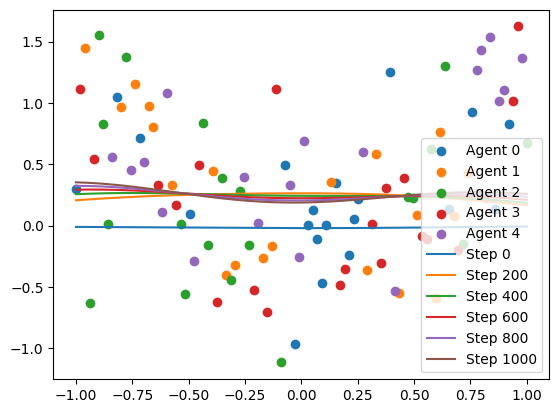

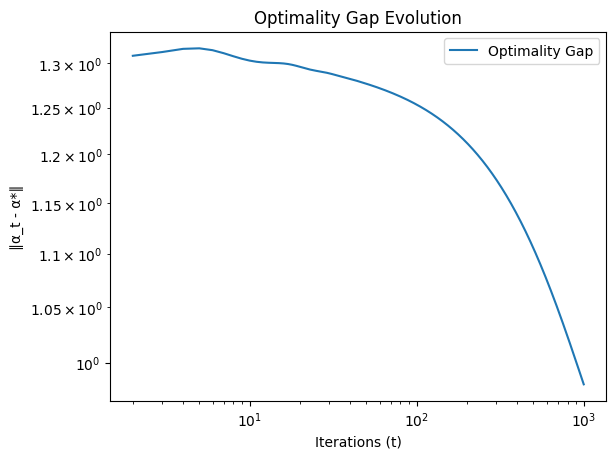

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pickle

from graph_tools import metropolis_weight_matrix, laplacian_weight_matrix
from kernel import kernel_matrix, grad_fi, calc_f
from centralized_solution import solve  # Importing solve from centralized solution

# Parameters
n = 100  # Number of data points
m = 10   # Number of selected points
a = 5    # Number of agents
step_size = 0.0005
step_count = 1000

# Load data
with open('/Users/gaspardblaise/Documents/ENSTA/Cooperative Optimisation for Data Science/Projet Kernel Ridge/first_database.pkl', 'rb') as f:
   X, y = pickle.load(f)

# Selected indexes for calculations
sel = list(range(n))
ind = np.random.choice(sel, m, replace=False)
x_selected = X[ind]  # Selected subset
Kmm = kernel_matrix(X, ind, ind)
Knm = kernel_matrix(X, sel, ind)

# Agents allocation
sel_copy = np.arange(n)
np.random.shuffle(sel_copy)
agents = np.array_split(sel_copy, a)

# Graph construction
G = nx.cycle_graph(a)
W = metropolis_weight_matrix(G)  # Metropolis weight matrix
W_hat = (np.eye(a) + W) / 2  # Recommended choice: (W + I)/2

# Compute optimal alpha using centralized method
alpha_opt, _ = solve(X[:n], y[:n], selection=True)

# Initialization
xi = np.random.normal(0, 0.01, size=(step_count+1, a, m))
g = np.zeros((step_count+1, a, m))

# Initial local gradient computation
for i, id_agent in enumerate(agents):
    g[0, i, :] = grad_fi(y, Kmm, Knm, xi[0, i, :], id_agent)

# EXTRA Algorithm Iteration
xi[1, :, :] = W @ xi[0, :, :] - step_size * g[0, :, :]
optimality_gaps = []
for k in range(step_count-1):
    xi[k+2, :, :] = (np.eye(a) + W) @ xi[k+1, :, :] - W_hat @ xi[k, :, :] - step_size * (g[k+1, :, :] - g[k, :, :])
    
    for i, id_agent in enumerate(agents):
        g[k+2, i, :] = grad_fi(y, Kmm, Knm, xi[k+2, i, :], id_agent)
    
    # Compute optimality gap
    optimality_gaps.append(np.sqrt(np.sum((alpha_opt - xi[k+2, 0, :]) ** 2)))

# Plot results
for i in range(a):
    plt.scatter(X[agents[i]], y[agents[i]], label=f"Agent {i}")

nt = 250
x_linspace = np.linspace(-1, 1, nt)
for s in range(0, step_count+1, step_count // 5):
    pred = [calc_f(X, ind, v, xi[s, 0, :]) for v in x_linspace]
    plt.plot(x_linspace, pred, label=f"Step {s}")

plt.legend()
plt.show()

# Plot optimality gap in log-log scale
plt.figure()
plt.loglog(range(2, step_count+1), optimality_gaps, label="Optimality Gap")
plt.xlabel("Iterations (t)")
plt.ylabel("∥α_t - α*∥")
plt.title("Optimality Gap Evolution")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pickle

from graph_tools import metropolis_weight_matrix, laplacian_weight_matrix
from kernel import kernel_matrix, grad_fi, calc_f
from centralized_solution import solve  # Importing solve from centralized solution

# Parameters
n = 100  # Number of data points
m = 10   # Number of selected points
a = 5    # Number of agents
step_size = 0.0001
step_count = 1000

# Load data
with open('/Users/gaspardblaise/Documents/ENSTA/Cooperative Optimisation for Data Science/Projet Kernel Ridge/first_database.pkl', 'rb') as f:
   X, y = pickle.load(f)

# Selected indexes for calculations
sel = list(range(n))
ind = np.random.choice(sel, m, replace=False)
x_selected = X[ind]  # Selected subset
Kmm = kernel_matrix(X, ind, ind)
Knm = kernel_matrix(X, sel, ind)

# Agents allocation
sel_copy = np.arange(n)
np.random.shuffle(sel_copy)
agents = np.array_split(sel_copy, a)

# Graph construction
G = nx.cycle_graph(a)
W = metropolis_weight_matrix(G)  # Metropolis weight matrix
W_hat = (np.eye(a) + W) / 2  # Recommended choice: (W + I)/2

# Compute optimal alpha using centralized method
alpha_opt, _ = solve(X[:n], y[:n], selection=True)

# Initialization
xi = np.random.normal(0, 0.01, size=(step_count+1, a, m))
g = np.zeros((step_count+1, a, m))

# Initial local gradient computation
for i, id_agent in enumerate(agents):
    g[0, i, :] = grad_fi(y, Kmm, Knm, xi[0, i, :], id_agent)

# DGD Algorithm Iteration
xi[1, :, :] = W @ xi[0, :, :] - step_size * g[0, :, :]
optimality_gaps = []
for k in range(step_count-1):
    xi[k+2, :, :] = (np.eye(a) + W) @ xi[k+1, :, :] - W_hat @ xi[k, :, :] - step_size * (g[k+1, :, :] - g[k, :, :])
    
    for i, id_agent in enumerate(agents):
        g[k+2, i, :] = grad_fi(y, Kmm, Knm, xi[k+2, i, :], id_agent)
    
    # Compute optimality gap
    optimality_gaps.append(np.sqrt(np.sum((alpha_opt - xi[k+2, 0, :]) ** 2)))

# Plot results
for i in range(a):
    plt.scatter(X[agents[i]], y[agents[i]], label=f"Agent {i}")

nt = 250
x_linspace = np.linspace(-1, 1, nt)
for s in range(0, step_count+1, step_count // 5):
    pred = [calc_f(X, ind, v, xi[s, 0, :]) for v in x_linspace]
    plt.plot(x_linspace, pred, label=f"Step {s}")

plt.legend()
plt.show()

# Plot optimality gap in log-log scale
plt.figure()
plt.loglog(range(2, step_count+1), optimality_gaps, label="Optimality Gap")
plt.xlabel("Iterations (t)")
plt.ylabel("∥α_t - α*∥")
plt.title("Optimality Gap Evolution")
plt.legend()
plt.show()
